In [2]:
import pandas as pd
import os
import warnings
import glob
import seaborn as sns


warnings.filterwarnings('ignore')

### Junta tudo

In [3]:
def junta_tudo(folder, colunas=None):
    
    df = pd.DataFrame()
    caminho_pasta = os.path.join(folder, '*csv')
    files = glob.glob(caminho_pasta)
    for file in files:
        dfloop = pd.read_csv(file, sep=';', usecols=colunas)
        df = pd.concat([df,dfloop])
    return df

In [4]:
'''

df = junta_tudo('./csv_v2/')

infracoes = open('infracoes.txt','r')

listaInfracoes = []

for l in infracoes:
    linha = l.strip()
    listaInfracoes.append(linha)

del infracoes

df = df[df.descricao_abreviada.isin(listaInfracoes)]

df.to_csv('./csv_v2/infracoes_filt.csv', index=False, sep=';')

'''

pass

### STL

Filtrando com as infracões selecionadas, houve redução de 63.219.086 para 39.721.279

In [5]:
df = pd.read_csv(
    'csv_v2/infracoes_filt.csv', 
    sep=';', 
    #nrows=15000000, 
    engine='c',
    usecols=['dat_infracao', 'uf_infracao', 'med_considerada'],
)

df.dat_infracao = pd.to_datetime(df['dat_infracao'])

In [6]:
df_ = df.set_index('dat_infracao').groupby(pd.Grouper(freq='D')).count()

In [7]:
df_['ocorrencias'] = df_.uf_infracao
df_.drop(['med_considerada','uf_infracao'], axis=1, inplace = True)

In [13]:
df_.head()

,ocorrencias
dat_infracao,
2007-01-01,1952
2007-01-02,2712
2007-01-03,1358
2007-01-04,3063
2007-01-05,1650


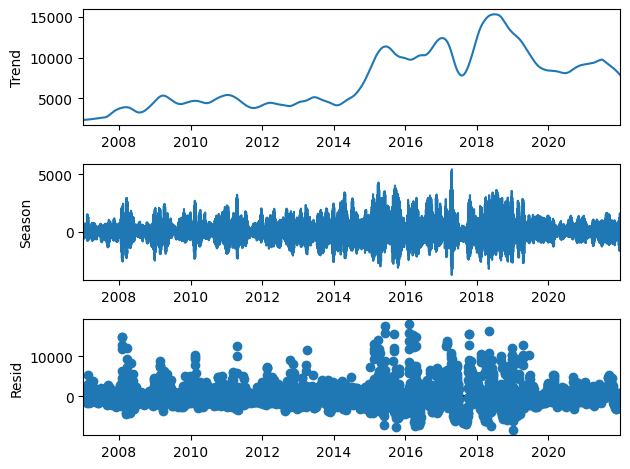

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.seasonal import STL


#df_2 = df_.loc['2007-01-01':'2007-12-31']
stl = STL(df_.ocorrencias, trend = 365, seasonal = 7)
res = stl.fit()
fig = res.plot(observed=False)


In [125]:
residuo = pd.DataFrame(res.resid)
residuo.rename(columns={'resid':'residuo'}, inplace=True)
residuo.reset_index(inplace=True)

residuo.describe()

,residuo
count,5479.000000
mean,6.019859
std,2384.895475
min,-8326.024324
25%,-1116.198714
50%,-230.204227
75%,828.742299
max,17890.430027


In [127]:
residuo.head()

,dat_infracao,residuo
0,2007-01-01,-17.702954
1,2007-01-02,52.244002
2,2007-01-03,-431.871914
3,2007-01-04,133.921664
4,2007-01-05,-43.713391


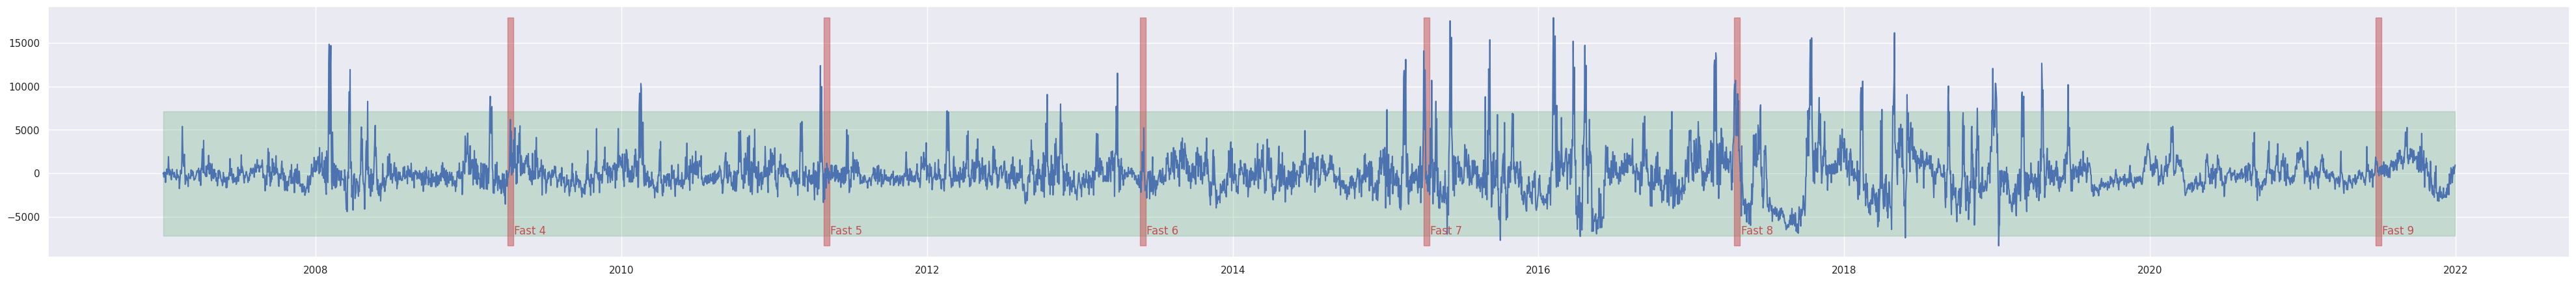

In [154]:
import matplotlib.pyplot as plt 

sns.set(rc={'figure.figsize':(50,5)})
filmes = {
    'Fast 4': '2009-04-03', 
    'Fast 5': '2011-04-29', 
    'Fast 6': '2013-05-24', 
    'Fast 7': '2015-04-02', 
    'Fast 8': '2017-04-13', 
    'Fast 9': '2021-06-24'
    }

x = residuo.dat_infracao
y = residuo.residuo
lower = residuo.describe().loc['mean'][0] + 3 * residuo.describe().loc['std'][0]
upper = residuo.describe().loc['mean'][0] - 3 * residuo.describe().loc['std'][0]

plt.plot(x,y)
plt.fill_between(
    [pd.Timestamp(residuo.dat_infracao.min()), pd.Timestamp(residuo.dat_infracao.max())], 
    lower, 
    upper, 
    color='g', 
    alpha=0.25
    )

for filme, ano in filmes.items():
#    plt.axvline(pd.Timestamp(ano), color='r')
    plt.text(pd.Timestamp(ano) + pd.DateOffset(days=16),-7000,s=filme, rotation=0, color='r')
    plt.fill_between(
        [pd.Timestamp(ano), pd.Timestamp(ano) + pd.DateOffset(days=14)],
        residuo.residuo.min(),
        residuo.residuo.max(),
        color='r',
        alpha=0.50,
        )


In [61]:
df_.ocorrencias.describe()

count     5479.00000
mean      7249.73152
std       4427.22708
min        531.00000
25%       3751.50000
50%       6163.00000
75%      10016.00000
max      32599.00000
Name: ocorrencias, dtype: float64

<AxesSubplot: xlabel='dat_infracao'>

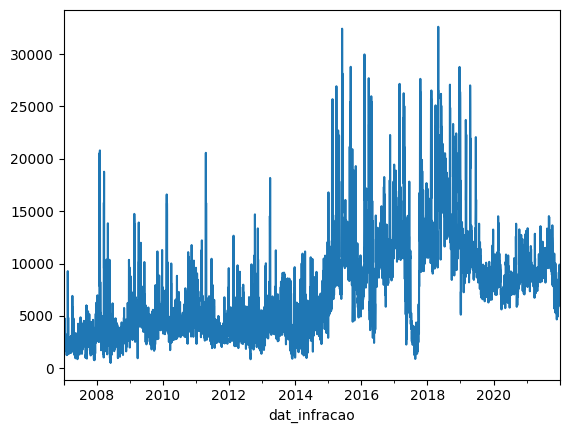

In [62]:
df_.ocorrencias.plot()

In [69]:
import statsmodels.api as sm

decomp = sm.tsa.seasonal_decompose(df_['ocorrencias'], model='multiplicative', period=7)

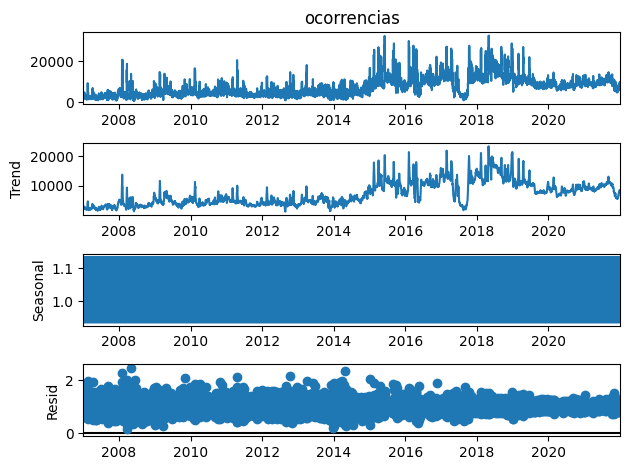

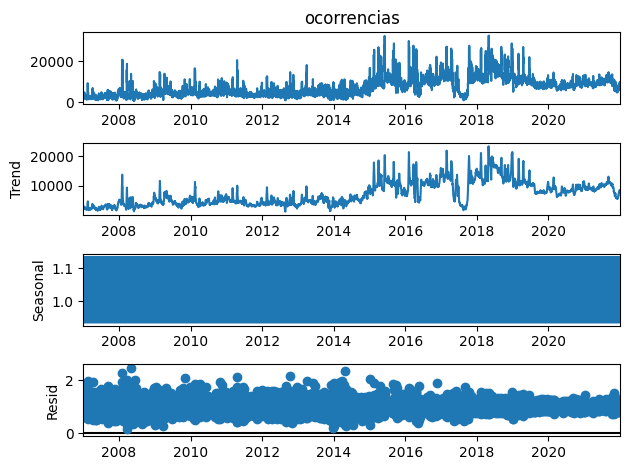

In [70]:
decomp.plot()

In [24]:
sns.histplot(
    df_.count,
    kde=True)

TypeError: object of type 'method' has no len()

In [46]:
frame.head().columns

Index(['uf_infracao', 'med_considerada'], dtype='object')

In [ ]:
lista = list(df.descricao_abreviada.unique())
lista.sort()

lista